# Multiple Linear Regression

## Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [37]:
dataset = pd.read_csv('bottle.csv')
dataset = dataset[:][:500]
print(dataset.describe())

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


          Cst_Cnt     Btl_Cnt       Depthm      T_degC  ...  TA1  TA2  pH2  pH1
count  500.000000  500.000000   500.000000  499.000000  ...  0.0  0.0  0.0  0.0
mean     8.548000  250.500000   341.490000    7.850421  ...  NaN  NaN  NaN  NaN
std      4.570062  144.481833   355.166886    2.911584  ...  NaN  NaN  NaN  NaN
min      1.000000    1.000000     0.000000    2.780000  ...  NaN  NaN  NaN  NaN
25%      5.000000  125.750000    55.000000    5.030000  ...  NaN  NaN  NaN  NaN
50%      9.000000  250.500000   200.000000    8.180000  ...  NaN  NaN  NaN  NaN
75%     12.250000  375.250000   598.500000   10.450000  ...  NaN  NaN  NaN  NaN
max     16.000000  500.000000  1352.000000   12.660000  ...  NaN  NaN  NaN  NaN

[8 rows x 70 columns]


In [38]:
print(dataset.head())

   Cst_Cnt  Btl_Cnt       Sta_ID  ... pH2  pH1  DIC Quality Comment
0        1        1  054.0 056.0  ... NaN  NaN                  NaN
1        1        2  054.0 056.0  ... NaN  NaN                  NaN
2        1        3  054.0 056.0  ... NaN  NaN                  NaN
3        1        4  054.0 056.0  ... NaN  NaN                  NaN
4        1        5  054.0 056.0  ... NaN  NaN                  NaN

[5 rows x 74 columns]


In [0]:
X = np.array(dataset['Salnty']).reshape(-1,1)
y = np.array(dataset['T_degC']).reshape(-1,1)

## Removing Nan values

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)
imputery = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputery.fit(y)
y= imputery.transform(y)

## Splitting the dataset into the Training set and Test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training Polynomial regression model with entire data

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
ploy_reg = PolynomialFeatures(degree = 2)
X_poly = ploy_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [43]:
y_pred = regressor.predict(ploy_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_pred),1)),1))

[[ 2.53  3.43]
 [10.93 11.95]
 [11.03 11.58]
 [10.44  9.75]
 [ 4.53  5.11]
 [ 7.45  8.71]
 [11.03 11.52]
 [ 6.42  7.13]
 [10.77 10.2 ]
 [11.03 11.64]
 [ 6.02  4.44]
 [10.99 11.99]
 [ 8.52  7.98]
 [11.03 11.23]
 [ 5.83  5.09]
 [ 7.18  8.25]
 [ 4.05  3.51]
 [10.31  9.79]
 [11.03 11.64]
 [ 9.55  8.83]
 [ 6.86  5.21]
 [ 5.51  5.2 ]
 [ 6.47  4.67]
 [ 7.43  7.71]
 [ 6.85  6.32]
 [ 2.75  3.04]
 [ 6.1   6.8 ]
 [ 5.22  4.8 ]
 [10.94 10.14]
 [ 8.04  8.06]
 [ 4.49  4.85]
 [ 3.87  4.21]
 [11.02 10.52]
 [10.72 12.63]
 [ 3.47  3.18]
 [ 5.    6.11]
 [11.02 11.5 ]
 [ 7.98  8.2 ]
 [10.91 11.49]
 [ 7.09  5.49]
 [10.95 11.13]
 [ 6.8   6.05]
 [ 3.62  3.89]
 [11.03 12.23]
 [ 7.72  7.71]
 [ 9.76 10.46]
 [ 3.57  3.37]
 [10.26  9.73]
 [ 8.32  8.67]
 [10.77  9.27]
 [ 6.42  6.34]
 [ 6.45  5.78]
 [10.98 11.4 ]
 [ 6.32  5.77]
 [11.01  9.29]
 [ 8.8   9.5 ]
 [ 8.43  8.66]
 [ 5.13  4.54]
 [11.01 12.2 ]
 [ 2.54  3.57]
 [ 6.98  6.93]
 [ 3.73  3.58]
 [10.77  9.6 ]
 [ 6.78  5.71]
 [ 5.34  6.24]
 [ 9.92 11.77]
 [ 9.46  9

## plotting polynomial curve for training data

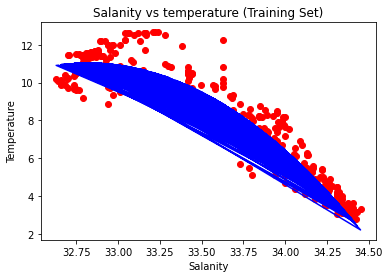

In [44]:
plt.scatter(X_train,y_train, color = 'red')
plt.plot(X_train,regressor.predict(ploy_reg.transform(X_train)), color = 'blue')
plt.title('Salanity vs temperature (Training Set)')
plt.xlabel('Salanity')
plt.ylabel('Temperature')
plt.show()

## Plotting polynomial curve for test data 

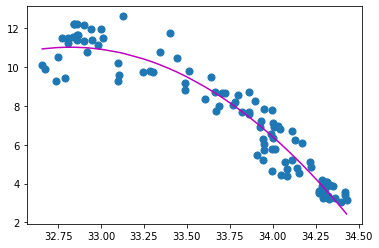

In [47]:
import operator
plt.scatter(X_test, y_test, s=50)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test,y_pred), key=sort_axis)
X_train, polynomial_predict = zip(*sorted_zip)
plt.plot(X_train, polynomial_predict, color='m')
plt.show()

## Model Evaluation

In [46]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.83
R2 Score for Test set: 0.92
